# Importing the Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [2]:
advertising_data=pd.read_csv("advertising.csv")

In [3]:
advertising_data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [5]:
advertising_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
advertising_data.shape

(200, 4)

In [7]:
advertising_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
advertising_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
advertising_data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# Visualization

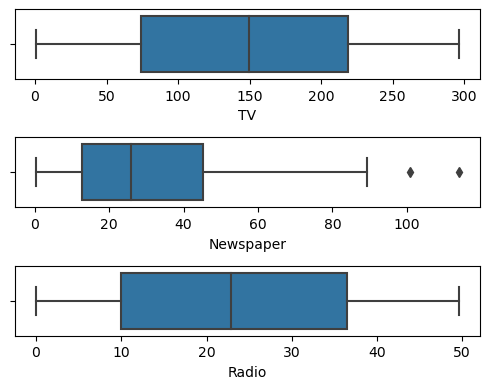

In [15]:
fig,axs=plt.subplots(3,figsize=(5,4))
plt1=sns.boxplot(x=advertising_data['TV'],ax=axs[0])
plt2=sns.boxplot(x=advertising_data['Newspaper'],ax=axs[1])
plt3=sns.boxplot(x=advertising_data['Radio'],ax=axs[2])
plt.tight_layout()
plt.show()

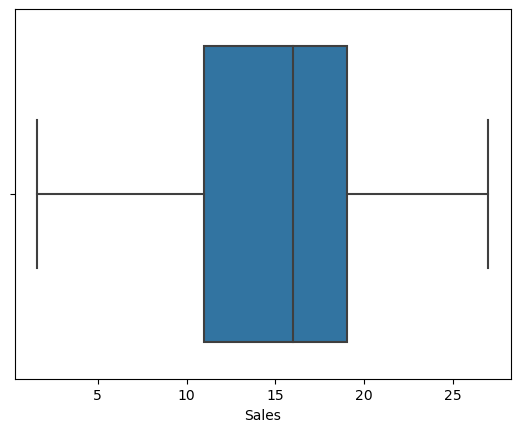

In [20]:
sns.boxplot(advertising_data['Sales'])
plt.show()

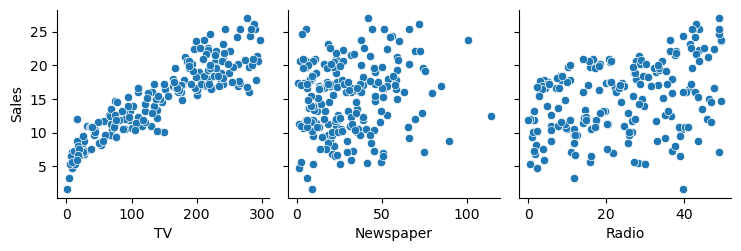

In [24]:
sns.pairplot(advertising_data,x_vars=['TV','Newspaper','Radio'],y_vars=['Sales'],kind='scatter')
plt.show()

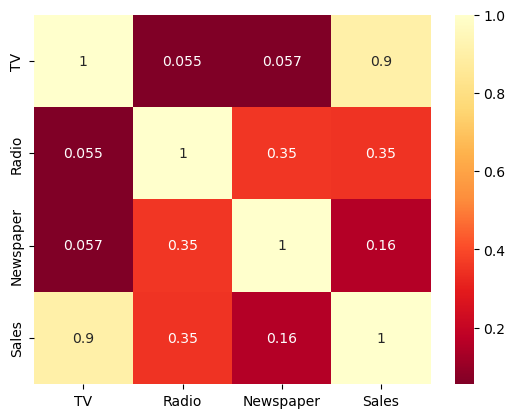

In [26]:
sns.heatmap(advertising_data.corr(),cmap='YlOrRd_r',annot=True)
plt.show()

# Train_test_split

In [27]:
from sklearn.model_selection import train_test_split

In [47]:
x_train,x_test,y_train,y_test=train_test_split(advertising_data[['TV']],advertising_data[['Sales']],test_size=0.3,random_state=0)

In [48]:
print(x_train)

        TV
131  265.2
96   197.6
181  218.5
19   147.3
153  171.3
..     ...
67   139.3
192   17.2
117   76.4
47   239.9
172   19.6

[140 rows x 1 columns]


In [49]:
print(x_test)

        TV
18    69.2
170   50.0
107   90.4
98   289.7
177  170.2
182   56.2
5      8.7
146  240.1
12    23.8
152  197.6
61   261.3
125   87.2
180  156.6
154  187.8
80    76.4
7    120.2
33   265.6
130    0.7
37    74.7
74   213.4
183  287.6
145  140.3
45   175.1
159  131.7
60    53.5
123  123.1
179  165.6
185  205.0
122  224.0
44    25.1
16    67.8
55   198.9
150  280.7
111  241.7
22    13.2
189   18.7
129   59.6
4    180.8
83    68.4
106   25.0
134   36.9
66    31.5
26   142.9
113  209.6
168  215.4
63   102.7
8      8.6
75    16.9
118  125.7
143  104.6
71   109.8
124  229.5
184  253.8
97   184.9
149   44.7
24    62.3
30   292.9
160  172.5
40   202.5
56     7.3


In [50]:
from sklearn.linear_model import LinearRegression
advertising_data_model=LinearRegression()
advertising_data_model.fit(x_train,y_train)

LinearRegression()

In [51]:
#Model Prediction
prediction=advertising_data_model.predict(x_test)

In [52]:
advertising_data_model.coef_

array([[0.05473199]])

In [53]:
advertising_data_model.intercept_

array([7.14382225])

In [55]:
0.0544343*69.2+7.14382225

10.91067581

In [61]:
# Building a linear model
import statsmodels.api as sm

In [57]:
sm_x_train=sm.add_constant(x_train)
lr=sm.OLS(y_train,sm_x_train).fit()

In [58]:
lr.params

const    7.143822
TV       0.054732
dtype: float64

In [59]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     573.1
Date:                Sun, 15 Oct 2023   Prob (F-statistic):           5.56e-51
Time:                        14:16:36   Log-Likelihood:                -312.40
No. Observations:                 140   AIC:                             628.8
Df Residuals:                     138   BIC:                             634.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1438      0.400     17.838      0.0

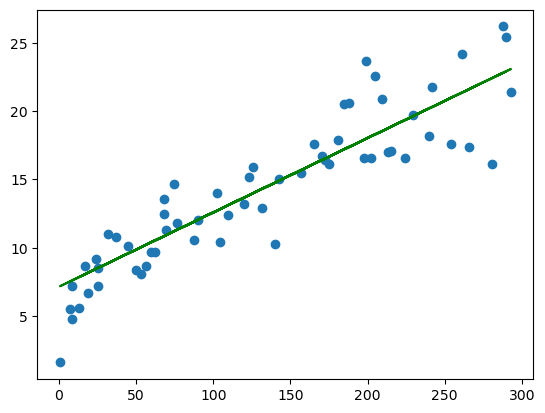

In [60]:
#visualizing the fit on the test set

plt.scatter(x_test,y_test)
plt.plot(x_test,7.14382225+0.054434*x_test,'g')
plt.show()